In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Low Alloy Steels(315).csv")
df.head()

,Steel,Condition,Tensile Strength (MPa),Tensile Strength (ksi),Yield Strength (MPa),Yield Strength (ksi),Elongation in 50 mm (%),Reduction in Area (%),Hardness (HB),HV (GPa)
0,8620,Normalized at 915 °C (1675 °F),635,92,360,52,26.3,59.7,183,17.721713
1,8620,Annealed at 870 °C (1600 °F),540,78,385,56,31.3,62.1,149,14.429154
2,8630,Normalized at 870 °C (1600 °F),650,94,425,62,23.5,53.5,187,18.109072
3,8630,Annealed at 845 °C (1550 °F),565,82,370,54,29.0,58.9,156,15.107034
4,8630,Water quenched from 845 °C (1550 °F) and tempe...,931,135,850,123,18.7,59.6,269,26.049949


In [3]:
df['YS/TS Ratio'] = df['Yield Strength (MPa)'] / df['Tensile Strength (MPa)']
df.head()

,Steel,Condition,Tensile Strength (MPa),Tensile Strength (ksi),Yield Strength (MPa),Yield Strength (ksi),Elongation in 50 mm (%),Reduction in Area (%),Hardness (HB),YS/TS Ratio
0,8620,Normalized at 915 °C (1675 °F),635,92,360,52,26.3,59.7,183,0.566929
1,8620,Annealed at 870 °C (1600 °F),540,78,385,56,31.3,62.1,149,0.712963
2,8630,Normalized at 870 °C (1600 °F),650,94,425,62,23.5,53.5,187,0.653846
3,8630,Annealed at 845 °C (1550 °F),565,82,370,54,29.0,58.9,156,0.654867
4,8630,Water quenched from 845 °C (1550 °F) and tempe...,931,135,850,123,18.7,59.6,269,0.912997


<Axes: title={'center': 'YS/TS Ratio vs Hardness'}, xlabel='Hardness (HB)', ylabel='YS/TS Ratio'>

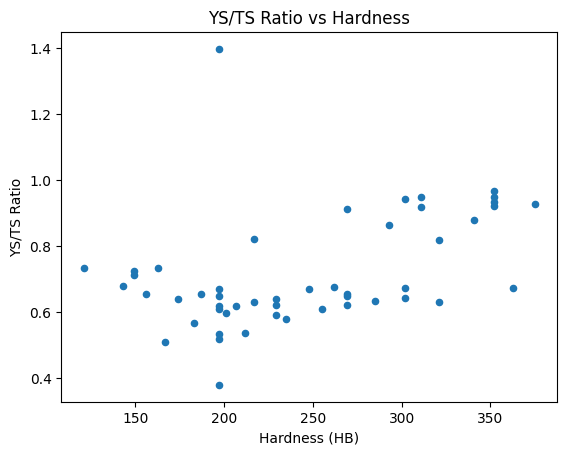

In [4]:

df['Hardness (HB)'] = pd.to_numeric(df['Hardness (HB)'], errors='coerce')
df_cleaned = df.dropna(subset=['Hardness (HB)', 'YS/TS Ratio'])
df_cleaned.plot(x='Hardness (HB)', y='YS/TS Ratio', kind='scatter', title='YS/TS Ratio vs Hardness')

In [33]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
X = df_cleaned[['Yield Strength (MPa)', 'YS/TS Ratio', 'Tensile Strength (MPa)']].values
y = df_cleaned['Hardness (HB)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


/opt/anaconda3/envs/Python-mediapipe-0-10-9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=8, verbose=0)


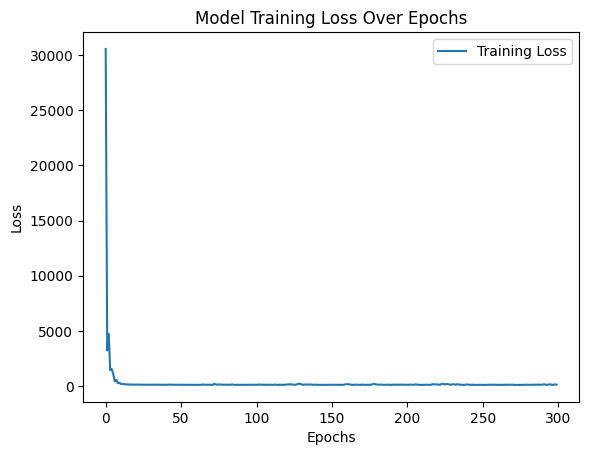

In [35]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss Over Epochs')
plt.legend()
plt.show()

In [36]:

# Predict on the test set
y_pred = model.predict(X_test).flatten()

# Compute MSE
mse = mean_squared_error(y_test, y_pred)

# Compute R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Mean Squared Error (MSE): 90.25403753413508
R-squared (R²): 0.9800463405850155


In [38]:
# Predict on the training set
y_train_pred = model.predict(X_train).flatten()

# Compute R-squared for training data
r2_train = r2_score(y_train, y_train_pred)

print(f"R-squared (R²) for Training Data: {r2_train}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R-squared (R²) for Training Data: 0.9733991763419149


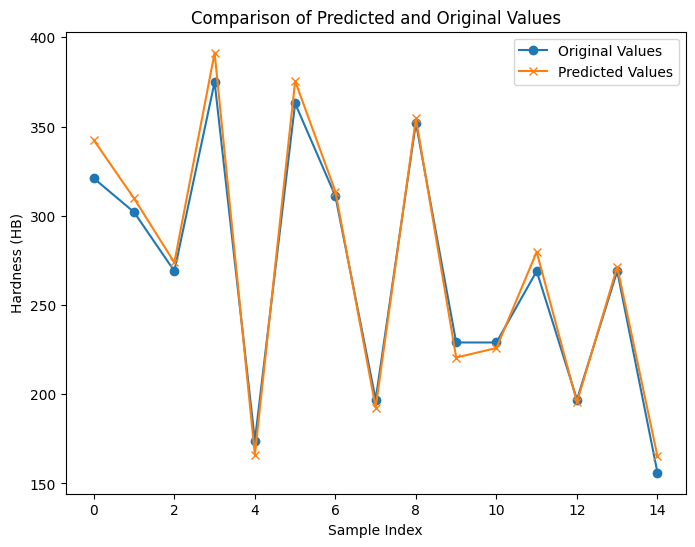

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Original Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Hardness (HB)')
plt.title('Comparison of Predicted and Original Values')
plt.legend()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Compute R-squared
r2_rf = r2_score(y_test, y_rf_pred)

print(f"R-squared (R²) for Random Forest: {r2_rf}")

R-squared (R²) for Random Forest: 0.9448093736366531
